<a href="https://colab.research.google.com/github/ZS4MLDL/learn_pytorch/blob/main/02_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import time
import torch.nn.functional as F
from torch.utils.data import DataLoader #for batches
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [5]:
train_dataset = datasets.FashionMNIST(root="/dataset", train=True,transform=transforms.ToTensor(), download=True)
test_dataset = datasets.FashionMNIST(root="/dataset", train=False, transform=transforms.ToTensor())

In [6]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /dataset
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /dataset
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size, shuffle=False)


In [10]:
class LogisticRegression(nn.Module):
  def __init__(self, in_dim, n_class):
    super().__init__()
    self.linear = nn.Linear(in_dim, n_class)

  def forward(self, x):
    out = self.linear(x)
    return out

In [11]:
model = LogisticRegression(28 * 28, 10)
model

LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [12]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0272,  0.0035, -0.0129,  ...,  0.0201, -0.0325,  0.0010],
                      [-0.0347, -0.0200,  0.0143,  ...,  0.0353, -0.0172, -0.0275],
                      [ 0.0007,  0.0237, -0.0025,  ..., -0.0139, -0.0017,  0.0337],
                      ...,
                      [-0.0331, -0.0086,  0.0026,  ...,  0.0246,  0.0319, -0.0312],
                      [-0.0017, -0.0130, -0.0172,  ...,  0.0261,  0.0302, -0.0185],
                      [-0.0093, -0.0042, -0.0050,  ..., -0.0121, -0.0199,  0.0332]])),
             ('linear.bias',
              tensor([ 0.0028, -0.0328, -0.0068, -0.0009,  0.0242, -0.0241, -0.0352, -0.0223,
                      -0.0060,  0.0304]))])

In [13]:
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [14]:
model = model.to(device )

In [15]:
learning_rate = 1e-3
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [18]:
num_epochs = 6

for epoch in range(num_epochs):
  running_loss = 0.0
  running_acc = 0.0
  model.train()

  for i, data in enumerate(train_loader, 1):
    img, label = data
    img = img.view(img.size(0), -1)
    img = img.to(device)
    label = label.to(device)
    out = model(img) #forward pass
    loss =criterion(out, label)
    running_loss+=loss.item()
    _, pred = torch.max(out, 1)
    running_acc+= (pred==label).float().mean()
    optimizer.zero_grad()
    loss.backward() #backward pass
    optimizer.step()
    if i % 300 == 0:
      print(f"[{epoch + 1}/{num_epochs}] loss: {running_loss/i:.6f}, accuracy: {running_acc/i:.6f}")
print(f"Finish {epoch + 1} epoch, loss:{running_loss/i:.6f}, acc: {running_acc/i:.6f}" )


[1/6] loss: 0.809496, accuracy: 0.745156
[1/6] loss: 0.801994, accuracy: 0.747266
[1/6] loss: 0.798218, accuracy: 0.748281
[2/6] loss: 0.776622, accuracy: 0.754948
[2/6] loss: 0.773704, accuracy: 0.757031
[2/6] loss: 0.773274, accuracy: 0.755625
[3/6] loss: 0.759138, accuracy: 0.761250
[3/6] loss: 0.754544, accuracy: 0.762969
[3/6] loss: 0.749734, accuracy: 0.764115
[4/6] loss: 0.733962, accuracy: 0.767500
[4/6] loss: 0.733818, accuracy: 0.768932
[4/6] loss: 0.731625, accuracy: 0.769792
[5/6] loss: 0.727903, accuracy: 0.767656
[5/6] loss: 0.718686, accuracy: 0.772109
[5/6] loss: 0.717120, accuracy: 0.773611
[6/6] loss: 0.705204, accuracy: 0.777135
[6/6] loss: 0.704411, accuracy: 0.777682
[6/6] loss: 0.702612, accuracy: 0.778437
Finish 6 epoch, loss:0.702039, acc: 0.778601


In [26]:
model.eval()

eval_loss = 0.
eval_acc = 0.

for data in test_loader:
  img, label = data
  img = img.view(img.size(0),-1)
  img= img.to(device)
  label = label.to(device)
  with torch.no_grad():
    out = model(img)
    loss = criterion(out,label)

  eval_loss+=loss.item()
  _,pred = torch.max(out,1)
  eval_acc+=(pred==label).float().mean()

print(f"test loss: {eval_loss/len(test_loader):.6f}, acc: {eval_acc/len(test_loader):.6f}")

test loss: 0.712332, acc: 0.766421


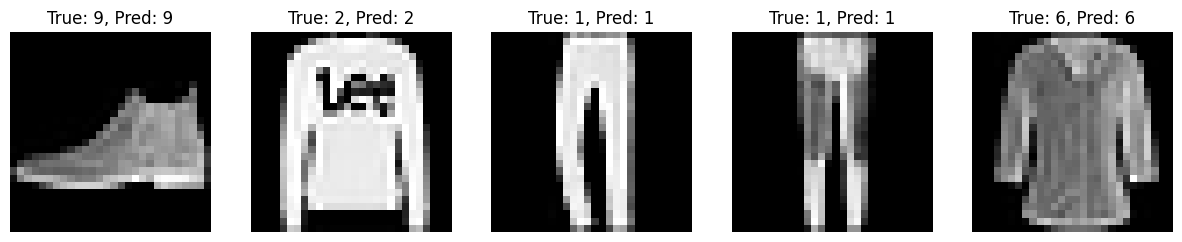

In [27]:

# Visualizing some predictions
images, labels = next(iter(test_loader))
images = images.reshape(-1, 28*28).to(device)
labels = labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)
#fig is a reference to the entire figure.
#ax is an array of Axes objects, and each Axes object can be used to draw a plot. Since there are 5 subplots, ax contains 5 such objects.
#figsize=(15, 3) sets the size of the entire figure to 15 inches wide and 3 inches tall.
fig, ax = plt.subplots(1, 5, figsize=(15, 3)) #The arguments (1, 5) specify that the figure should have 1 row of 5 columns, i.e., 5 subplots aligned horizontally.
for i in range(5):
    ax[i].imshow(images[i].reshape(28, 28).cpu(), cmap='gray')
    ax[i].set_title(f'True: {labels[i].item()}, Pred: {predicted[i].item()}')
    ax[i].axis('off')
plt.show()